# SVM Project - Bank Dataset
   SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

# Abstract:
   Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction.Nevertheless, there are different variables that determine whether amarketing campaign will be successful or not. There are certain variables that we needto take into consideration when making a marketing campaign.A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening a deposit account) in which your money will be returned back at a specific maturity time.

# Problem Statement:
   Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictiveanalytics

#### Libraries:

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset:

In [108]:
mydata=pd.read_csv("bank-additional1-full.csv",sep = ';')
mydata.head()
mydata.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


#### Check the datatypes:

In [103]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Pre-processing

### Statistical summary:

In [7]:
mydata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Check outlier:

In [104]:
mydata_col =mydata[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

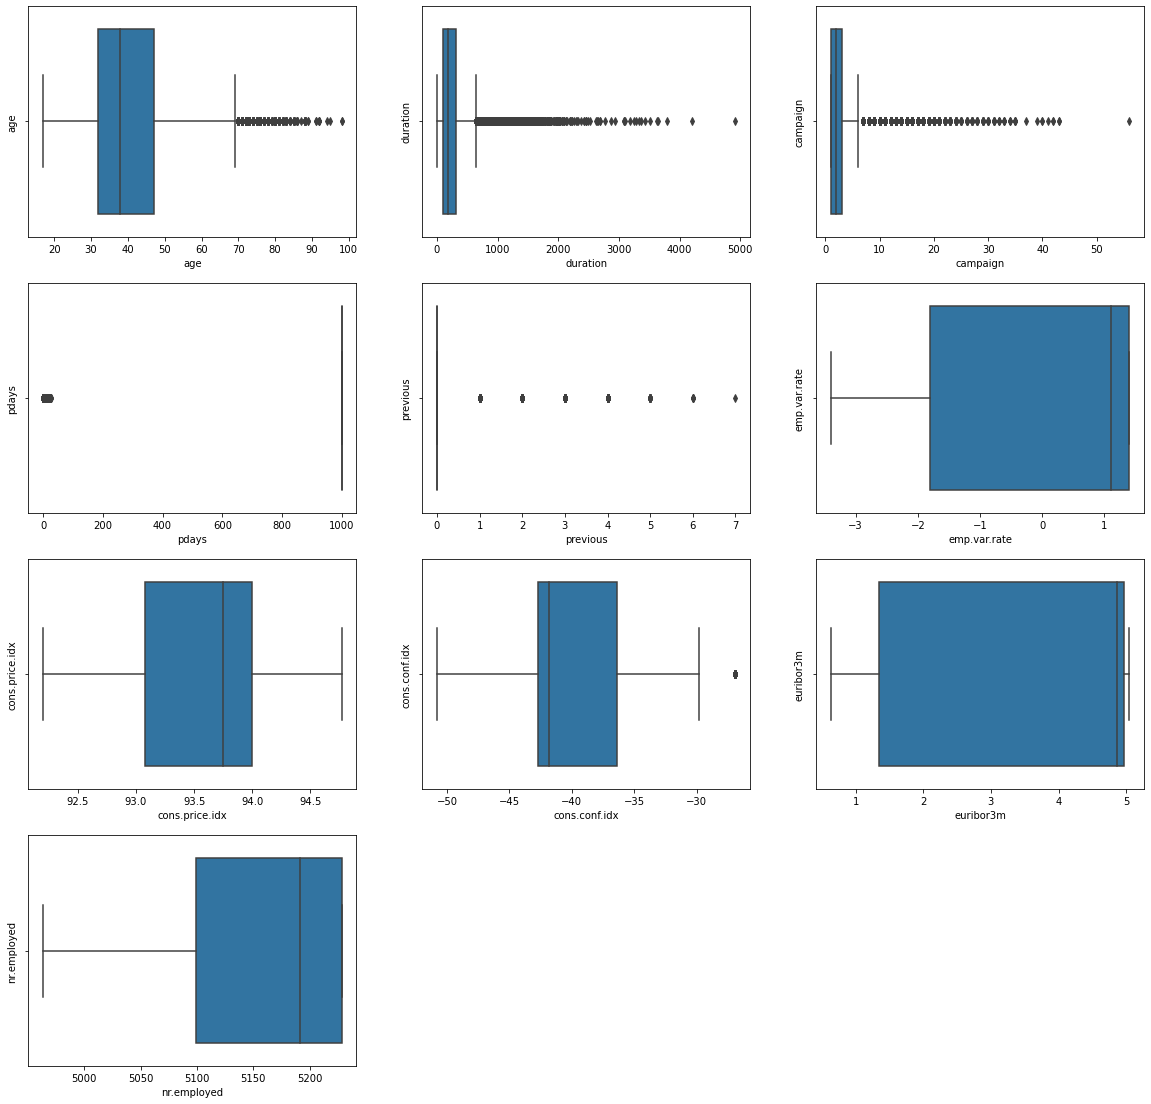

In [105]:
plt.figure(figsize=(20,50))
for i,col in enumerate(mydata_col,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

## Correlation:
   To check the relation between the variables.

In [106]:
mydata_corr =mydata.corr()
mydata_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#### Heatmap:

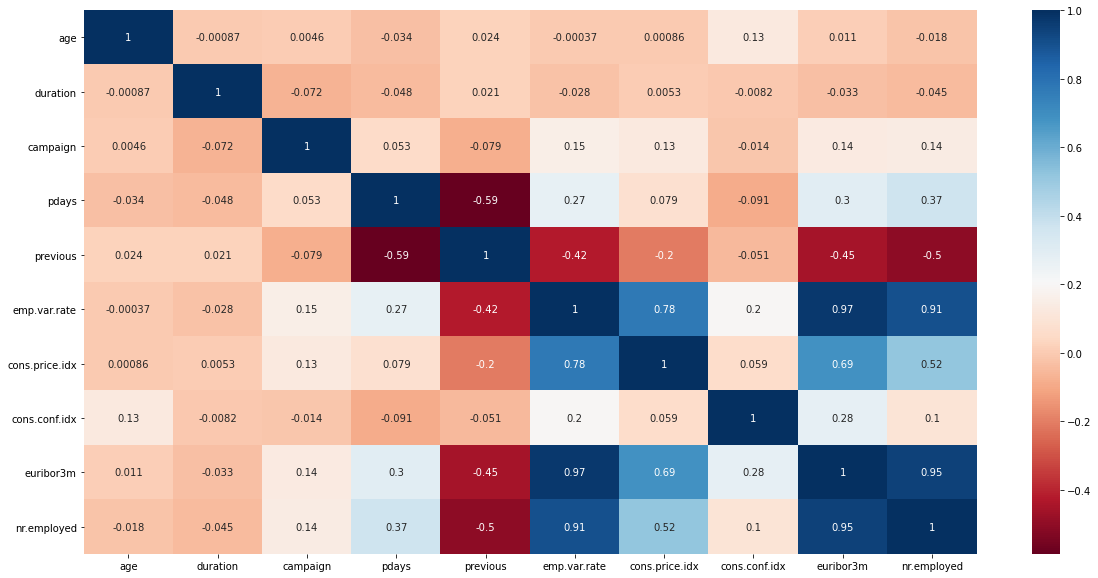

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(mydata_corr,annot = True,cmap = 'RdBu')

### check the linearity:

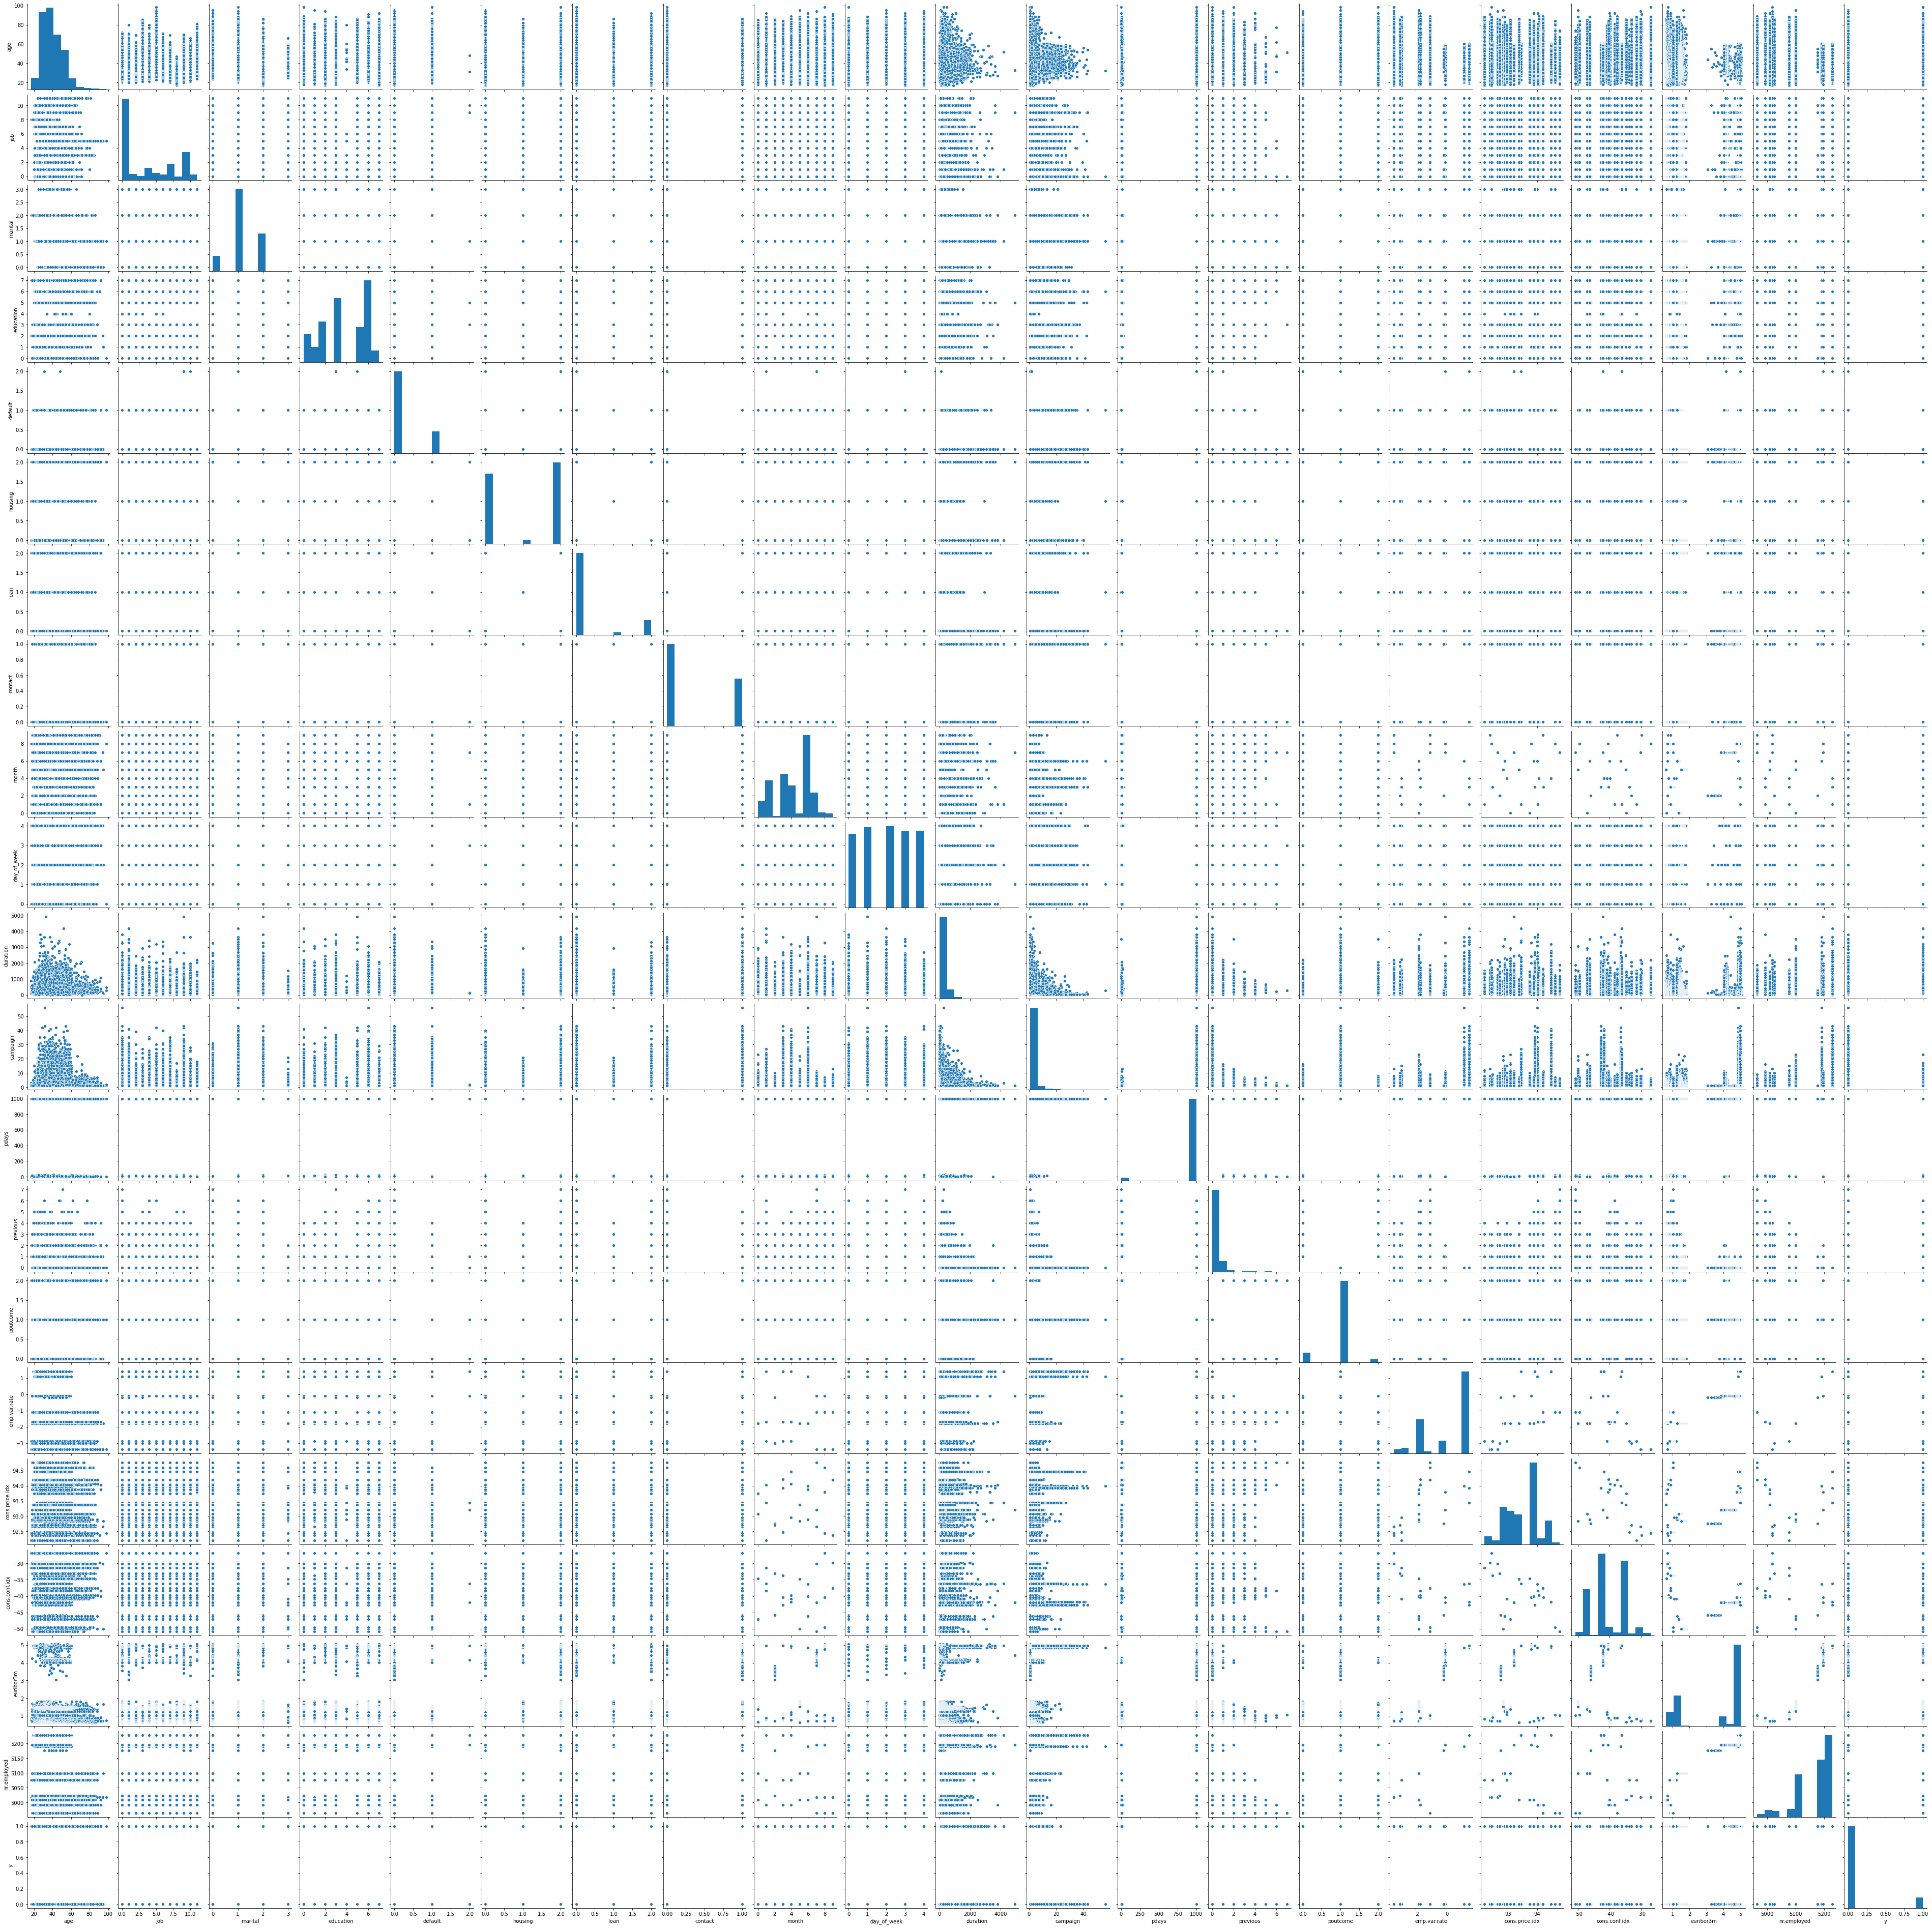

In [112]:
sns.pairplot(mydata) 

### Data Analysis:

In [109]:
from sklearn.preprocessing import  LabelEncoder
LE =LabelEncoder()
mydata['job'] = LE.fit_transform(mydata.job)
mydata['marital'] = LE.fit_transform(mydata.marital)
mydata['education'] = LE.fit_transform(mydata.education)
mydata['default'] = LE.fit_transform(mydata.default)
mydata['housing'] = LE.fit_transform(mydata.housing)
mydata['loan'] = LE.fit_transform(mydata.loan)
mydata['contact'] = LE.fit_transform(mydata.contact)
mydata['month'] = LE.fit_transform(mydata.month)
mydata['day_of_week'] = LE.fit_transform(mydata.day_of_week)
mydata['poutcome'] = LE.fit_transform(mydata.poutcome)
mydata['y'] = LE.fit_transform(mydata.y)


In [110]:
mydata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Check null values:

In [100]:
mydata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Standardize:

In [118]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [120]:
x_ind = mydata.drop('y', axis = 1)
x_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [122]:
y_dep = mydata['y']
y_dep.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

#### We split our dataset as train and test data

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x_ind,y_dep,train_size = 0.8,random_state =2)

In [124]:
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

# Support Vector Machine:
   The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:Linear,Polynomial,Radial basis function(RBF),Sigmoid.

In [145]:
from sklearn.svm import SVC # SVC is support 

In [146]:
model1=SVC(kernel='linear')

##### Model fitting

In [147]:
fit_model=model1.fit(x_train,y_train) # fit the model 

##### After being fitted, the model can then be used to predict new values:

In [149]:
y_pred1=fit_model.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

### Performance Measures:
   After predicted values we use confusion matrix for performace measures.

In [151]:
confusion_matrix(y_test,y_pred1)

array([[7188,  130],
       [ 660,  260]])

In [153]:
accuracy_score(y_test,y_pred1)

0.9041029376062151

### The accuracy for this dataset using SVC is 96%.We have used kerner as linear.

In [154]:
fit_model.n_support_

array([3356, 3341], dtype=int32)

In [155]:
kernel=['linear','rbf','poly','sigmoid']
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print("Kernel: ", i)
    print("Acc score: " , accuracy_score(y_test,model1.predict(x_test)))

Kernel:  linear
Acc score:  0.9041029376062151
Kernel:  rbf
Acc score:  0.9101723719349356
Kernel:  poly
Acc score:  0.9088370963826171
Kernel:  sigmoid
Acc score:  0.8630735615440641


### Classification Report

In [156]:
from sklearn.metrics import classification_report # classifiaction_report from sklearn

In [157]:
c_report = classification_report(y_test,y_pred1)

In [158]:
print(c_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7318
           1       0.67      0.28      0.40       920

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.67      8238
weighted avg       0.89      0.90      0.89      8238



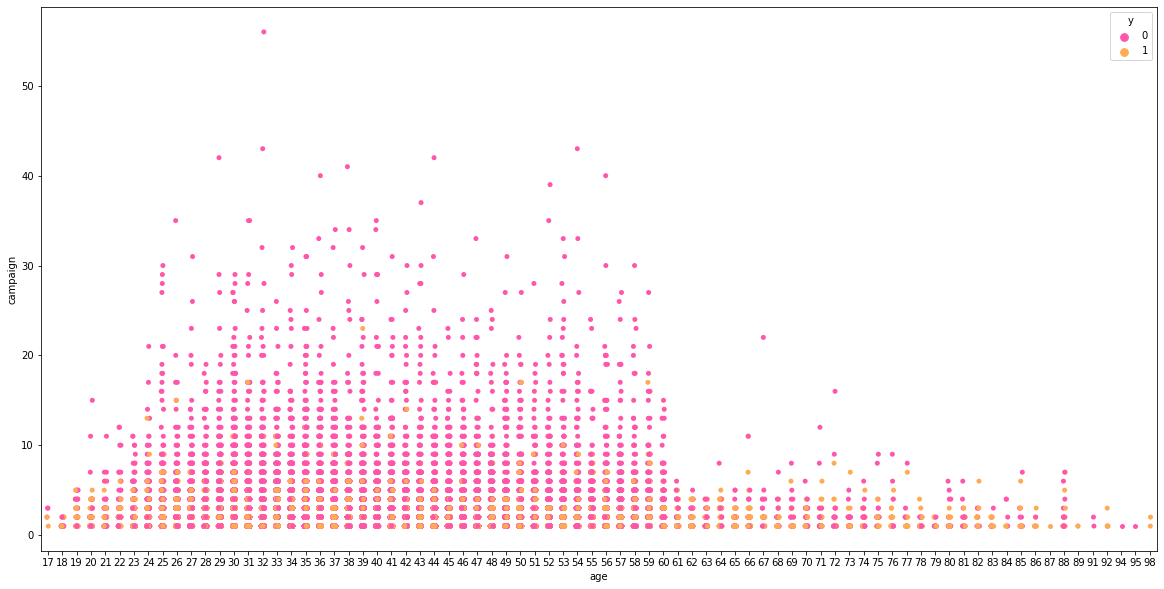

In [160]:
plt.figure(figsize=(20,10))
sns.stripplot(x='age',y='campaign',data=mydata,palette='spring',hue='y')

# Conclusion:
   SVM used to find how many data are present in each group.Thus SVM predicted 90 % accuracy.A client of a bank will subscribe to a termdeposit or not such that banks can plan the different campaigns for different customers based on our model.